In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
plt.style.use('seaborn-white')


In [32]:
boston = pd.read_csv('../data/Boston.csv')

In [33]:
boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [34]:
boston_lr = boston[['lstat', 'medv']]
boston_lr

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [35]:
X = boston_lr.lstat
X = sm.add_constant(X)

Y = boston_lr.medv

linear_model = sm.OLS(Y,X)
linear_results = linear_model.fit()

print(linear_results.summary())
type(linear_results)


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           5.08e-88
Time:                        16:23:06   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

C:\Users\Khachatur\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


statsmodels.regression.linear_model.RegressionResultsWrapper

In [36]:
print(linear_results.bse.lstat)
print(linear_results.fvalue)
print(linear_results.pvalues.lstat)
print(linear_results.tvalues.lstat)
print(linear_results.conf_int().loc['lstat'])

0.03873341621263943
601.6178711098953
5.081103394387796e-88
-24.52789985118773
0   -1.026148
1   -0.873951
Name: lstat, dtype: float64


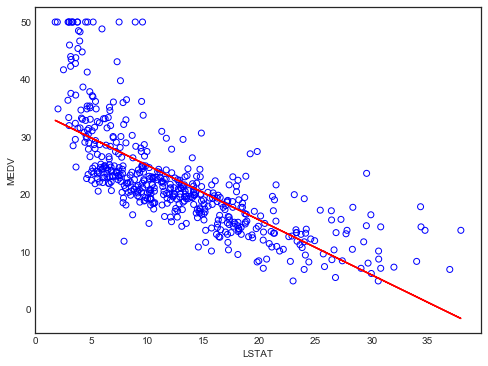

In [37]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(boston_lr.lstat.values, boston_lr.medv.values,facecolors='none', edgecolors='b',\
           label="data");
ax.set_ylabel('MEDV');
ax.set_xlabel('LSTAT');

ax.plot(boston_lr.lstat.values, linear_results.fittedvalues, 'r', label="OLS");


In [38]:
from statsmodels.stats.outliers_influence import summary_table

simpleTable, data, column_names = summary_table(linear_results, alpha=0.05)
simpleTable

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,24.0,29.822595097668305,0.4058143453353232,29.02529895667068,30.61989123866593,17.584603246788586,42.06058694854802,-5.822595097668305,6.202498862106662,-0.9387498856695762,0.0018862150344469428
2.0,21.6,25.870389786035062,0.3080112642430648,25.265245598335447,26.475533973734677,13.64341293590341,38.09736663616671,-4.270389786035061,6.208124231876627,-0.6878711872594377,0.000582366845079387
3.0,34.7,30.7251419837384,0.4334876695721809,29.873476560638657,31.576807406838142,18.48348779001718,42.96679617745962,3.974858016261603,6.200626247214329,0.6410413815938887,0.0010042099597060475
4.0,33.4,31.760695779334608,0.4667940373644452,30.84359393483513,32.67779762383408,19.514315122220726,44.007076436448486,1.639304220665391,6.198207865503978,0.26448035565068917,0.00019836962438466024
5.0,36.2,29.49007782385301,0.3959935098112714,28.71207650166774,30.26807914603828,17.253327868776264,41.72682777892976,6.709922176146993,6.203133607903486,1.0816987993935518,0.002384166409538841
6.0,28.7,29.60408374630397,0.3993360168420555,28.819515460709116,30.388652031898825,17.366914514798264,41.841252977809674,-0.9040837463039715,6.202919325847072,-0.1457513307543315,4.402301265446057e-05
7.0,22.9,22.744727412171272,0.27645929778830025,22.201572805136887,23.287882019205657,10.520661790092365,34.96879303425018,0.15527258782872622,6.209609301234722,0.025005210520708886,6.196762965995196e-07
8.0,27.1,16.360395754917576,0.3737406711081145,15.62611418445673,17.094677325378424,4.126347658295298,28.594443851539854,10.739604245082425,6.204514108943103,1.730933971058669,0.005435708719897734
9.0,16.5,6.118863721406431,0.724000518266514,4.696432932723502,7.54129451008936,-6.175690876233201,18.413418319046063,10.38113627859357,6.173451276787093,1.6815774213085426,0.019445783381344315


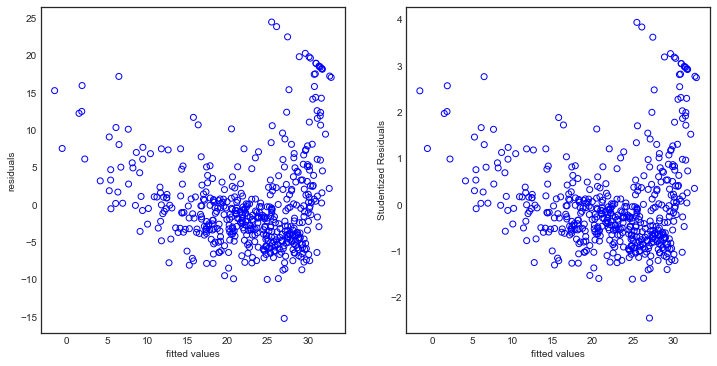

In [39]:
# Create plots of residuals
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# RESIDUALS
# The results contain the residuals
fitted_values = linear_results.fittedvalues
residuals = linear_results.resid

# Plot the residual for each fitted value
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# The residual plot indicates significant nonlinearity (a u-shape pattern is clear)

# STUDENTIZED RESIDUALS
studentized_residuals = linear_results.resid_pearson

# Plot the studentized residuals
ax2.scatter(fitted_values,studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_ylabel('Studentized Residuals');
ax2.set_xlabel('fitted values');

# |studentized residual| > 3 are generally considered outliers

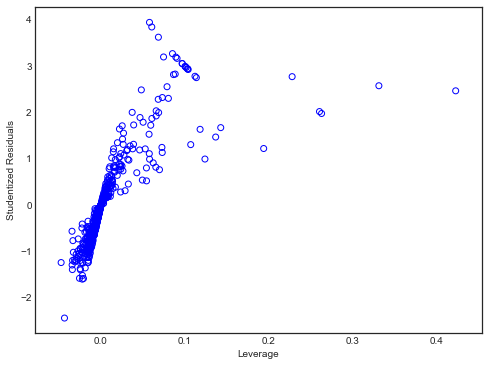

In [40]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = OLSInfluence(linear_results).influence

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, studentized_residuals,facecolors='none', edgecolors='b');
ax.set_xlabel('Leverage');
ax.set_ylabel('Studentized Residuals');

In [41]:
boston_lr['age'] = boston['age']
boston_lr

C:\Users\Khachatur\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,lstat,medv,age
0,4.98,24.0,65.2
1,9.14,21.6,78.9
2,4.03,34.7,61.1
3,2.94,33.4,45.8
4,5.33,36.2,54.2
...,...,...,...
501,9.67,22.4,69.1
502,9.08,20.6,76.7
503,5.64,23.9,91.0
504,6.48,22.0,89.3


In [42]:
X = boston_lr[['lstat', 'age']]
X = sm.add_constant(X)

Y = boston_lr.medv

ml_model = sm.OLS(Y,X)
ml_results = ml_model.fit()

print(ml_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           2.98e-88
Time:                        16:23:12   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [43]:
print('Model parameters:\n', ml_results.params[:])


Model parameters:
 const    33.222761
lstat    -1.032069
age       0.034544
dtype: float64


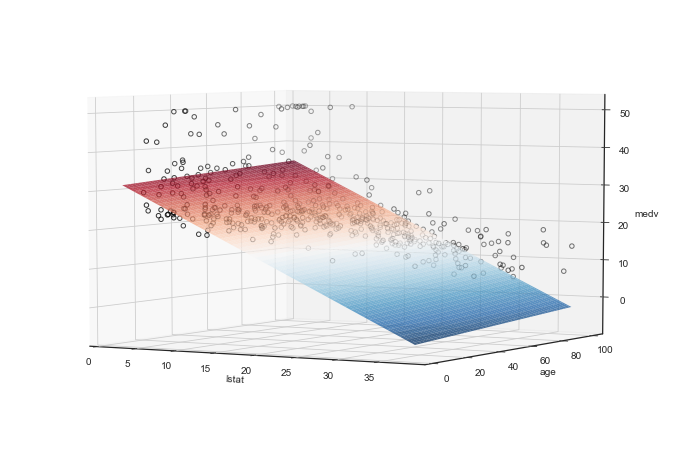

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d',azim=-60, elev=5)

ax.scatter(X.lstat, X.age, Y.values, facecolors=(0,0,0,0),\
           edgecolor='k', depthshade=True);
ax.set_xlabel('lstat');
ax.set_ylabel('age')
ax.set_zlabel('medv')

xx1, xx2 = np.meshgrid(np.linspace(X.lstat.min(), X.lstat.max(), 100), 
                       np.linspace(X.age.min(), X.age.max(), 100))

# plot the plane by evaluating the parameters over the grid
Z = ml_results.params[0] + ml_results.params[1] * xx1 + ml_results.params[2] * xx2
# plot plane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.75, linewidth=0)

In [45]:
X = sm.add_constant(boston.iloc[:,1:-1])

# create the model instance and estimate
all_pred_model = sm.OLS(Y,X)
all_pred_results = all_pred_model.fit()
# data about the model is stored in summary
print(all_pred_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 23 Jan 2020   Prob (F-statistic):          6.72e-135
Time:                        16:23:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIFs = [(predictor, variance_inflation_factor(X.values,_)) \
        for _,predictor in enumerate(list(X))] # list(X) returns column names of df

print(VIFs)

[('const', 585.2652379423121), ('crim', 1.792191547433241), ('zn', 2.2987581787494418), ('indus', 3.9915964183460315), ('chas', 1.0739953275537883), ('nox', 4.393719847577493), ('rm', 1.9337444357832565), ('age', 3.1008255128153364), ('dis', 3.9559449063727263), ('rad', 7.484496335274472), ('tax', 9.00855394759707), ('ptratio', 1.7990840492488978), ('black', 1.348521076406375), ('lstat', 2.9414910780919366)]


In [47]:
import statsmodels.formula.api as smf
inter_model = smf.ols(formula='medv ~ lstat*age', data=boston)
inter_results = inter_model.fit()
print(inter_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           4.86e-88
Time:                        16:23:18   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [49]:
boston_lr['lstat_pow2'] = boston_lr.lstat.transform(np.square)

X = sm.add_constant(boston_lr[['lstat', 'lstat_pow2']])
Y = boston_lr.medv

# create the model instance and estimate
quad_model = sm.OLS(Y,X)
quad_results = quad_model.fit()
# data about the model is stored in summary
print(quad_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 23 Jan 2020   Prob (F-statistic):          1.56e-112
Time:                        16:23:52   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.0

C:\Users\Khachatur\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


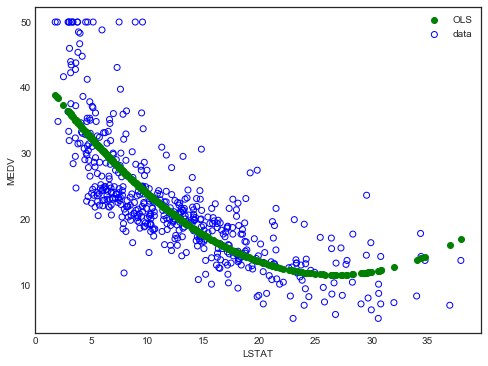

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

# get numpy array values from dataframe
x = boston_lr.lstat.values
y = boston_lr.medv.values

# Plot the data
ax.scatter(x, y, facecolors='none', edgecolors='b', label="data");
# plot the models fitted values
ax.plot(x, quad_results.fittedvalues, 'g', marker='o',linestyle='none', label="OLS");

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

In [21]:
# import anova function
from statsmodels.stats.api import anova_lm

# perform the hypothesis test (see https://en.wikipedia.org/wiki/F-test regression section)
anova_table = anova_lm(linear_results, quad_results)
print(anova_table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


C:\Users\Khachatur\Miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Khachatur\Miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Khachatur\Miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [54]:
carseats = pd.read_csv('../data/Carseats.csv')
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [57]:
carseats_pred = carseats.iloc[:, 1:]
carseats_pred

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [72]:
carseats_pred['Income:Advertising'] = carseats_pred.Advertising.multiply(carseats_pred.Income)
carseats_pred['Price:Age'] = carseats_pred.Age.multiply(carseats_pred.Price) 
carseats_pred = pd.get_dummies(carseats_pred)

X = sm.add_constant(carseats_pred)
Y = carseats.Sales

car_model = sm.OLS(Y,X)
car_results = car_model.fit()
print(car_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 23 Jan 2020   Prob (F-statistic):          6.14e-166
Time:                        22:12:30   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7861      0